# K-Means application in unsupervised and semi-supervised learning

Two applications of K-Means are test:
- One for classification of images and copmaring it with CPA and Random Forrest.
- Second it is shown how K-Means can be used to have a quick but rough labeling of a dataset that has not been human labeled.

## Importing the libraries

In [1]:
import sys
import sklearn
import numpy as np
import os
import random
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.datasets import fetch_openml
from sklearn import linear_model
from sklearn.decomposition import PCA

np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Read the data

Reading the data from sklearn datasets and then splitting it into train and test sets

In [2]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()
X_train, X_test, y_train, y_test = train_test_split(olivetti['data'], olivetti['target'], 
                                                    stratify = np.full_like(olivetti['target'], True), test_size=0.1)

## Visualizing the data

X_train shape: (360, 4096)
y_train shape: (360,)
X_test shape: (40, 4096)
y_test_shape: (40,)


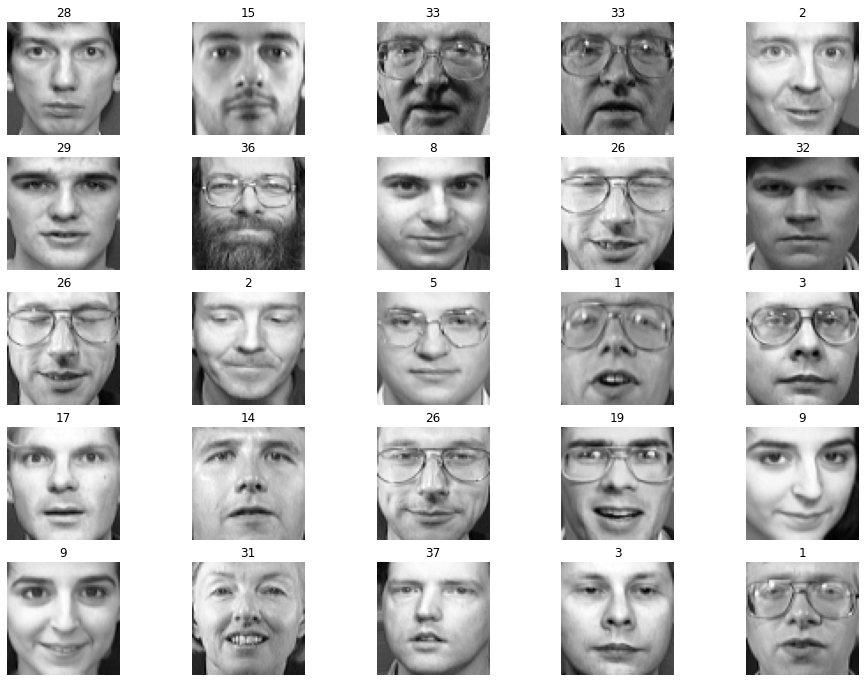

In [3]:
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test_shape: " + str(y_test.shape))

fig, ax = plt.subplots(5, 5, figsize=(16, 12))
for i in range(25):
    r = random.randint(0, X_train.shape[0])
    img = X_train[r].reshape(64, 64)
    ax[i // 5, i % 5].imshow(img, cmap = 'gray')
    label = y_train[r]
    ax[i // 5, i % 5].set_title(label)
    ax[i // 5, i % 5].set_axis_off()

## Dimension reduction using PCA

We reduce the dimensions until 95% of variance is kept to speed up the next steps.

In [4]:
pca = PCA(n_components = 0.95, svd_solver = 'full')
x_train_pca = pca.fit_transform(X_train)

print("Exmplained variance with {} dimensions is {}%".format(len(pca.explained_variance_), np.sum(pca.explained_variance_)))

Exmplained variance with 117 dimensions is 75.67630004882812%


Although we tried to keep 95% of variance, the PCA keeps 75% of variance in 117 dimensions.

# K-Means

We try to do the K-means with varying number of clusters from 5 to 145 in steps of 5 and at each step store the results into a list.

In [5]:
k_range = range(5, 150, 10)
kmeans_per_k = []
for k in k_range:
    print("k = {} Done.".format(k))
    km = KMeans(n_clusters = k)
    y_pred = km.fit_predict(x_train_pca)
    kmeans_per_k.append(km)


k = 5 Done.
k = 15 Done.
k = 25 Done.
k = 35 Done.
k = 45 Done.
k = 55 Done.
k = 65 Done.
k = 75 Done.
k = 85 Done.
k = 95 Done.
k = 105 Done.
k = 115 Done.
k = 125 Done.
k = 135 Done.
k = 145 Done.


Using Silhouette score [Link](https://en.wikipedia.org/wiki/Silhouette_(clustering)) we select the best value for number of clusters.

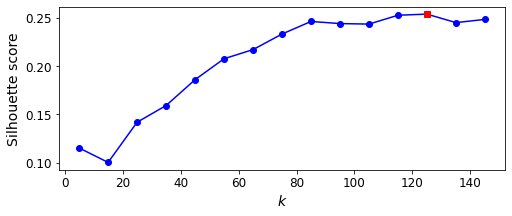

In [6]:
silhouette_scores = [silhouette_score(x_train_pca, model.labels_) for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

We expected to have 40 classes since there are 40 people in the dataset. The reason we get higher number is that the same person may look very different to this simple algorith in different photos.

In [7]:
print("The best number of clusters is found to be {}".format(best_k))
best_model = kmeans_per_k[best_index]

The best number of clusters is found to be 125


From the Silhouette score plot we see that although the max is at 135 but we may be OK and not lose that much if we pick a smaller number. So lets go back and pick 90 and re-run the model.

In [8]:
selected_k = 95
km = KMeans(n_clusters = selected_k)
y_pred = km.fit_predict(x_train_pca)
selected_model = km

## Visualizing the result

First define a function to plot an array of image

In [9]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

Iterate over all of our 95 classes in the selected model and show the images in each class together with their true label.

Cluster 0


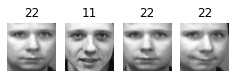

Cluster 1


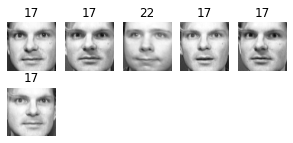

Cluster 2


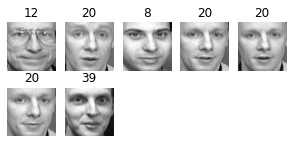

Cluster 3


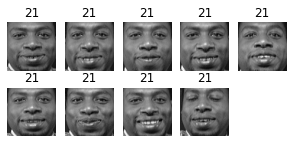

Cluster 4


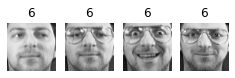

Cluster 5


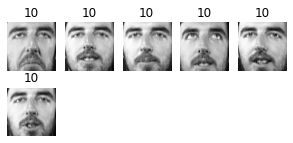

Cluster 6


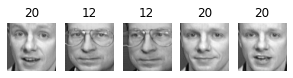

Cluster 7


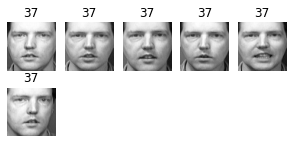

Cluster 8


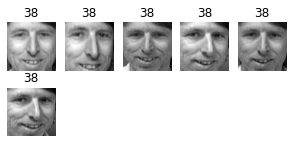

Cluster 9


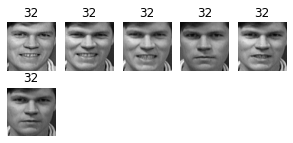

Cluster 10


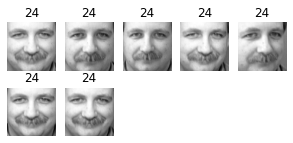

Cluster 11


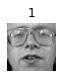

Cluster 12


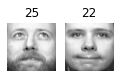

Cluster 13


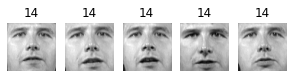

Cluster 14


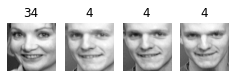

Cluster 15


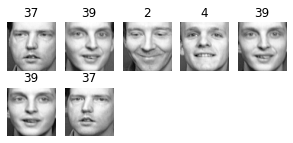

Cluster 16


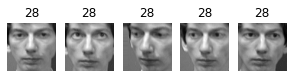

Cluster 17


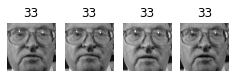

Cluster 18


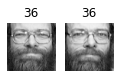

Cluster 19


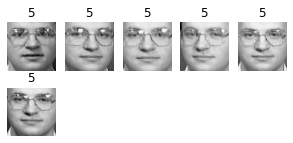

Cluster 20


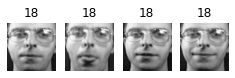

Cluster 21


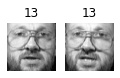

Cluster 22


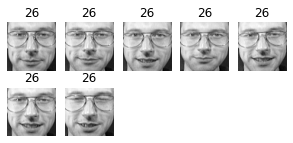

Cluster 23


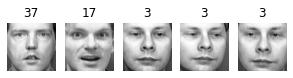

Cluster 24


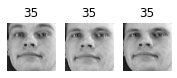

Cluster 25


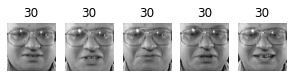

Cluster 26


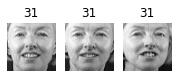

Cluster 27


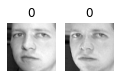

Cluster 28


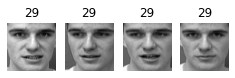

Cluster 29


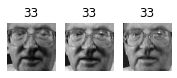

Cluster 30


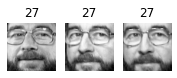

Cluster 31


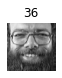

Cluster 32


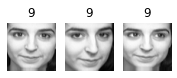

Cluster 33


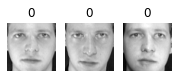

Cluster 34


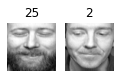

Cluster 35


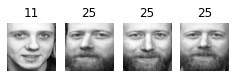

Cluster 36


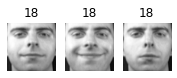

Cluster 37


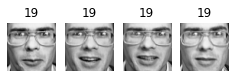

Cluster 38


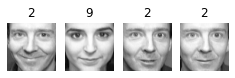

Cluster 39


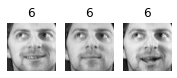

Cluster 40


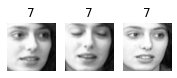

Cluster 41


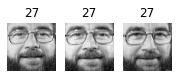

Cluster 42


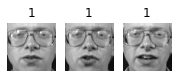

Cluster 43


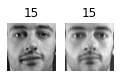

Cluster 44


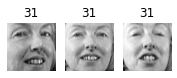

Cluster 45


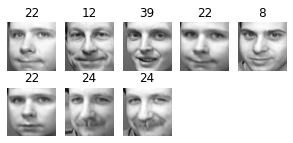

Cluster 46


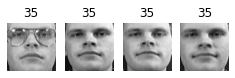

Cluster 47


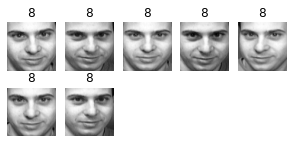

Cluster 48


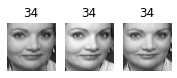

Cluster 49


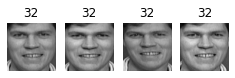

Cluster 50


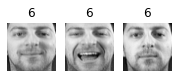

Cluster 51


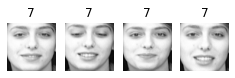

Cluster 52


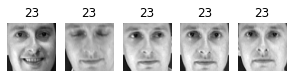

Cluster 53


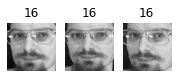

Cluster 54


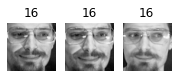

Cluster 55


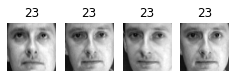

Cluster 56


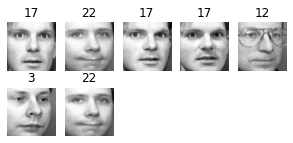

Cluster 57


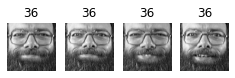

Cluster 58


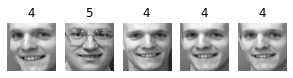

Cluster 59


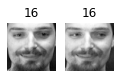

Cluster 60


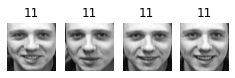

Cluster 61


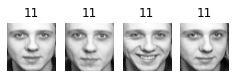

Cluster 62


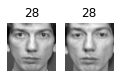

Cluster 63


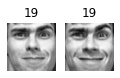

Cluster 64


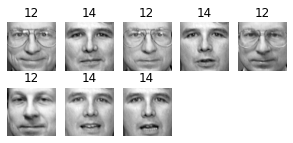

Cluster 65


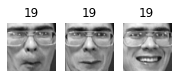

Cluster 66


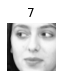

Cluster 67


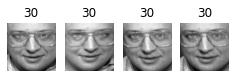

Cluster 68


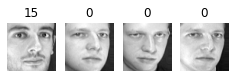

Cluster 69


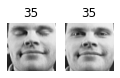

Cluster 70


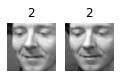

Cluster 71


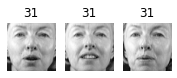

Cluster 72


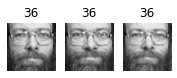

Cluster 73


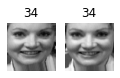

Cluster 74


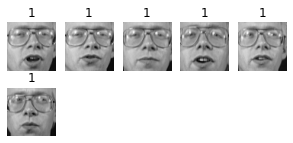

Cluster 75


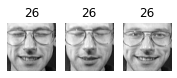

Cluster 76


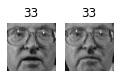

Cluster 77


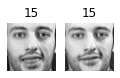

Cluster 78


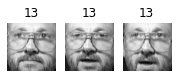

Cluster 79


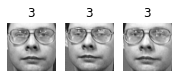

Cluster 80


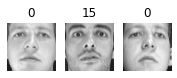

Cluster 81


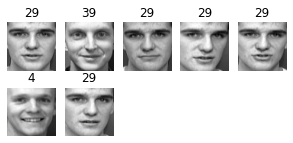

Cluster 82


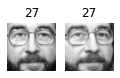

Cluster 83


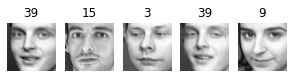

Cluster 84


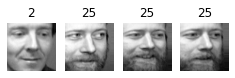

Cluster 85


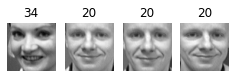

Cluster 86


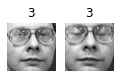

Cluster 87


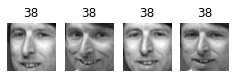

Cluster 88


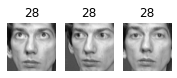

Cluster 89


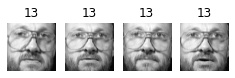

Cluster 90


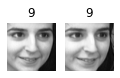

Cluster 91


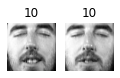

Cluster 92


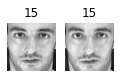

Cluster 93


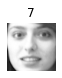

Cluster 94


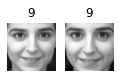

In [10]:
for cluster_id in np.unique(selected_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = selected_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

## Conclusion

We can observe from the result that clustering this way is not so precise but still it is going to very useful as a starting point when dealing with unlabeled datasets. This will be shown later.



# Random Forrest

What happens if we train a random forest model to predict the labels for this dataset?
First we try this without any dimension reduction (with the original dimensions of the images)

In [11]:
start = time.time()
clf = RandomForestClassifier(n_estimators=150, max_features=None, random_state=42)
clf.fit(X_train, y_train)
end = time.time()
acc = clf.score(X_test, y_test)
print(f"Accuracy on the test dataset is {acc} and the fitting took {end - start} sec")

Accuracy on the test dataset is 0.9 and the fitting took 146.38091945648193 sec


Well, yes, we may be able to get decent accuracy if we don't reduce the dimension of the data but it takes very long time to fit the model.

Next we look at performance on Random forrest on data reduced by PCA and data reduction by our selected K-means model. 

In [12]:
x_test_pca = pca.transform(X_test)

In [13]:
start = time.time()
clf = RandomForestClassifier(n_estimators=150, max_features=None, random_state=42)
clf.fit(x_train_pca, y_train)
end = time.time()
acc = clf.score(x_test_pca, y_test)
print(f"Accuracy on the test dataset is {acc} and the fitting took {end - start} sec")

Accuracy on the test dataset is 0.875 and the fitting took 3.773322820663452 sec


Doing the PCA dimension reduction improves the speed of fitting by around 40x and there is not much loss of performance.

What if we reduce the dimensions using our selected K-mean model. 

The method 'model.transform' returns the distance for each data input to the center of each k clusters. So output dimension for each data(image) is k, and this acts like a non-linear dimension reduction. We also note that our PCA has 117 features and our selected K-Means model has 95.

In [14]:
x_train_reduced = selected_model.transform(x_train_pca)
x_test_reduced = selected_model.transform(x_test_pca)

start = time.time()
clf = RandomForestClassifier(n_estimators=150, max_features=None, random_state=42)
clf.fit(x_train_reduced, y_train)
end = time.time()

acc = clf.score(x_test_reduced, y_test)
print(acc)
print(end-start)

0.725
5.0585057735443115


The loss of performance compared to PCA may be due to smaller number of features and the fact that we are feeding data that is once reduced by PCA.

# Using K-means to label an unlabeled dataset

Imagine that we have a dataset that is not human labeled and we want to apply ML techniques to have a first rough estimate of the labels. We can do this by K-means. Lets illustrate this on MNIST digits dataset that has a lot more examples and we have used before.

In [16]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)
X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'], test_size = 0.1, random_state=42)

print(f"number of trainig examples is {X_train.shape[0]}")

number of trainig examples is 63000


We need the number of clusters to be several times higher than the number of classes in the dataset as we know that K-means does not work precisely.

In [17]:
k = 50
start = time.time()
kmeans = KMeans(n_clusters=k, random_state=42)
X_dist = kmeans.fit_transform(X_train)
end = time.time()
print(f"It took {end - start} sec to fit the K-Means model.")

It took 80.75897812843323 sec to fit the K-Means model.


We now have the fitted the model and X_dist is the distance vector for each images to the center of each of cluster cluster. 

So for each digit image we have a vector of k = 50, illustrating how far its vector is from the center of each cluster.

For each of the clusters if we take the index that has minimum distance, we can find the best representitive of that cluster. It is like finding the images at the center of that cluster because our training set is large.

In [18]:
representative_digit_idx = np.argmin(X_dist, axis=0)

Now we find the true label for these reperesentitive images. Since we have 50 clusters and 10 classes, we expect to have around 5 clusters that map to each of the 10 true label classes.

This means that for example we only have to label 10 images!

In [19]:
y_representative_digits = y_train[representative_digit_idx]
print("Mapping between clusters and the true labels :")
print(y_representative_digits)

Mapping between clusters and the true labels :
[0 6 9 3 1 0 0 4 1 8 7 0 9 6 0 4 3 1 8 9 3 7 9 6 2 7 7 0 2 8 4 5 4 6 7 2 6
 8 3 5 3 6 2 5 3 2 8 1 6 1]


Now we can iterate over all the clusters:
- For each cluster find the images that are assigned to that cluster.
- Assigned the predicted label of those images to the mapping between that cluster and the labels

In [20]:
y_train_predicted = np.empty(len(X_train))
for i in range(k):
    y_train_predicted[kmeans.labels_ == i] = y_representative_digits[i]

y_success = y_train_predicted == y_train
success_rate = 100 * np.count_nonzero(y_success) / len(y_train)
print(f"Predicted {success_rate}% of the labels correctly.")


Predicted 80.63015873015873% of the labels correctly.


## Visualizing the predicted labels

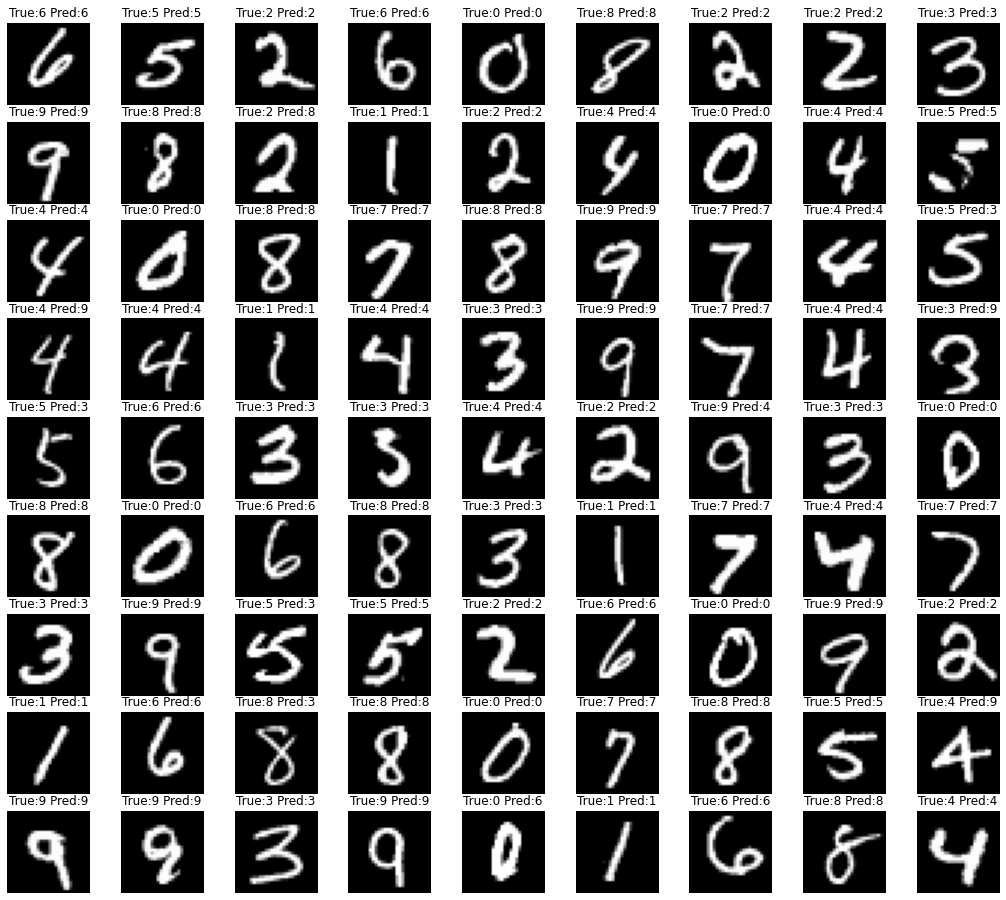

In [21]:
M = 9
fig, ax = plt.subplots(M, M, figsize=(18, 16))
for i in range(M * M):
    r = random.randint(0, X_train.shape[0])
    img = X_train[r].reshape(28, 28)
    ax[i // M, i % M].imshow(img, cmap = 'gray')
    label = f"True:{y_train[r]} Pred:{int(y_train_predicted[r])}"
    ax[i // M, i % M].set_title(label)
    ax[i // M, i % M].set_axis_off()